In [1]:
from utilities import NoisyLearningAlgorithm
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


Classifying digits e.g. y = 5 v.s. all other numbers between 0 to 9. The algorithm queries agent to label chosen points for n_budget =200 times, then creates a classifer to label rest of the points itself.

Query budget: 200
dataset size: 1797
Feature space deimension: 64
Sum of explained variance with 2 components: 0.2850936482369929


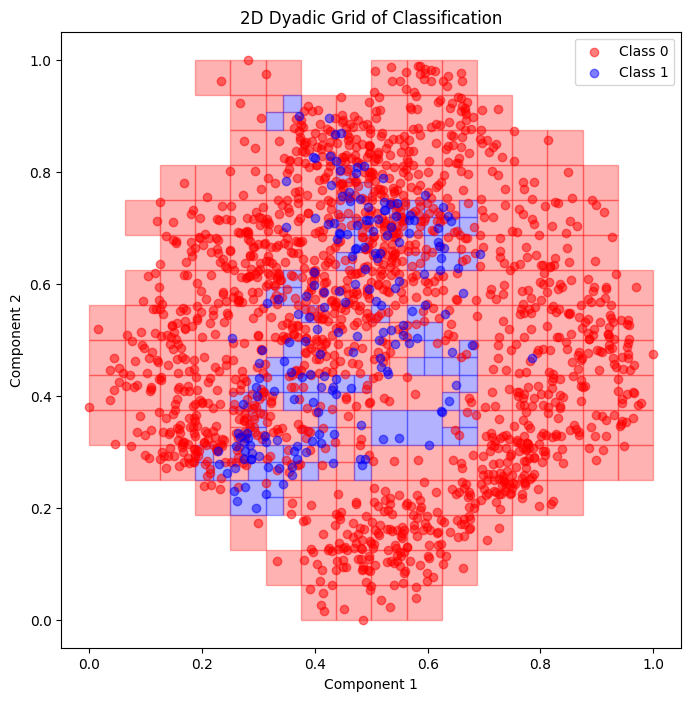

Model: NoisyLearningAlgorithm
Mean Accuracy: 0.8381
Mean AUC-ROC: 0.6491
report:                      0           1  accuracy    macro avg  weighted avg
precision     0.930429    0.289575  0.838063     0.610002      0.865524
recall        0.886068    0.412088  0.838063     0.649078      0.838063
f1-score      0.907707    0.340136  0.838063     0.623922      0.850223
support    1615.000000  182.000000  0.838063  1797.000000   1797.000000


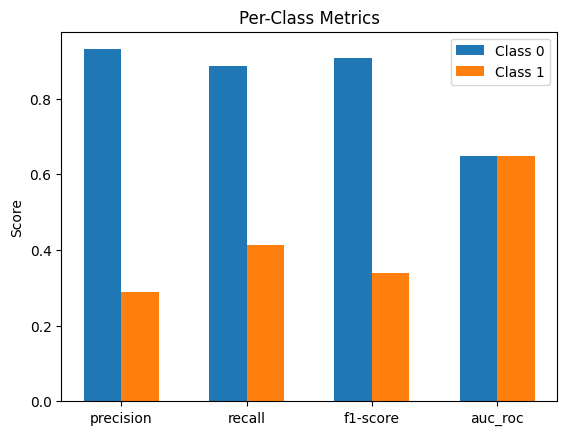

In [7]:
# Case y = 5


digits = load_digits()
X, y = digits.data, digits.target
labels = (y == 5).astype(int)  # Binary classification: 1 if digit is 1, else 0. y could be any number in [0, 9]

# Reduce dimension by PCA and scale to [0,1]^k
n_budget = 200 # Query budget
feature_dimension = 2 # for feature_dimension = 2 and 3, it plots the 2D or #d dyadic grid
pca = PCA(n_components=feature_dimension)
X_pca = pca.fit_transform(X)
scaler = MinMaxScaler(feature_range=(0, .9999999))
data = scaler.fit_transform(X_pca)

#### Meta info
print(f'Query budget: {n_budget}')
print(f'dataset size: {X.shape[0]}')
print(f'Feature space deimension: {X.shape[1]}')
print(f'Sum of explained variance with {feature_dimension} components: {sum(pca.fit(X).explained_variance_ratio_)}')

# Run algorithm
algo = NoisyLearningAlgorithm(n_budget=n_budget, delta=0.05, alpha=0.01, lambda_=1.0, feature_dimension= feature_dimension, B_l_alpha= .3, initial_depth_level= 4)
s0, s1, ac, results= algo.run(data, labels)
algo.plot_dyadic_grid(data,labels)
algo.evaluate_model(data, labels)

Query budget: 200
dataset size: 1797
Feature space deimension: 64
Sum of explained variance with 3 components: 0.4030395858767508


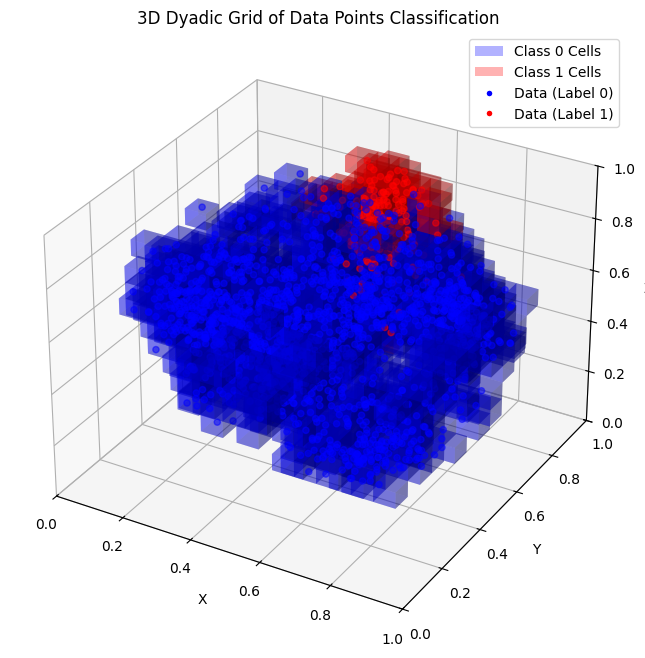

Model: NoisyLearningAlgorithm
Mean Accuracy: 0.9694
Mean AUC-ROC: 0.9209
report:                      0           1  accuracy    macro avg  weighted avg
precision     0.984501    0.836957  0.969393     0.910729      0.969804
recall        0.981459    0.860335  0.969393     0.920897      0.969393
f1-score      0.982977    0.848485  0.969393     0.915731      0.969581
support    1618.000000  179.000000  0.969393  1797.000000   1797.000000


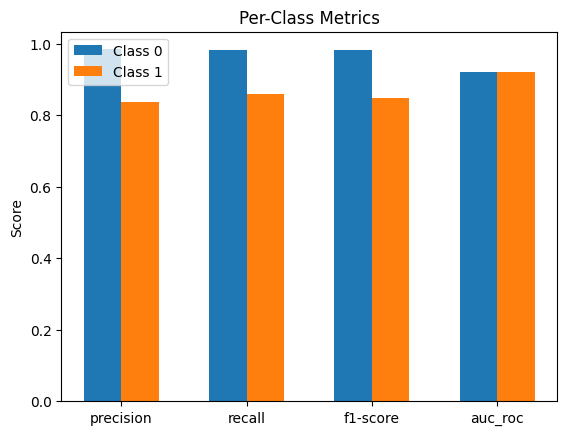

In [8]:
# Case y = 7

digits = load_digits()
X, y = digits.data, digits.target
labels = (y == 7).astype(int)  # Binary classification: 1 if digit is 1, else 0. y could be any number in [0, 9]

# Reduce dimension by PCA and scale to [0,1]^k
n_budget = 200 # Query budget
feature_dimension = 3 # for feature_dimension = 2 and 3, it plots the 2D or #d dyadic grid
pca = PCA(n_components=feature_dimension)
X_pca = pca.fit_transform(X)
scaler = MinMaxScaler(feature_range=(0, .9999999))
data = scaler.fit_transform(X_pca)

#### Meta info
print(f'Query budget: {n_budget}')
print(f'dataset size: {X.shape[0]}')
print(f'Feature space deimension: {X.shape[1]}')
print(f'Sum of explained variance with {feature_dimension} components: {sum(pca.fit(X).explained_variance_ratio_)}')

# Run algorithm
algo = NoisyLearningAlgorithm(n_budget=n_budget, delta=0.05, alpha=0.01, lambda_=1.0, feature_dimension= feature_dimension, B_l_alpha= .3, initial_depth_level= 4)
s0, s1, ac, results= algo.run(data, labels)
algo.plot_dyadic_grid(data,labels)
algo.evaluate_model(data, labels)